In [1]:
from lppls import lppls, data_loader, lppls_cmaes
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# read example dataset into df 
data = data_loader.nasdaq_dotcom()

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-01-03,774.109985,777.289978,768.409973,770.760010,770.760010,253020000
1,1994-01-04,771.429993,774.780029,771.020020,774.280029,774.280029,298600000
2,1994-01-05,775.229980,778.210022,773.690002,778.049988,778.049988,349880000
3,1994-01-06,780.359985,781.210022,778.250000,780.409973,780.409973,349210000
4,1994-01-07,779.289978,783.390015,778.200012,782.940002,782.940002,330060000


In [4]:
# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

In [5]:
time[:10]

[727931,
 727932,
 727933,
 727934,
 727935,
 727938,
 727939,
 727940,
 727941,
 727942]

In [6]:
# create list of observation data
price = np.log(data['Adj Close'].values)

In [7]:
price[:10]

array([6.64737705, 6.6519336 , 6.65679077, 6.65981939, 6.66305607,
       6.66783427, 6.66634594, 6.66806304, 6.66925694, 6.67495273])

In [8]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [9]:
observations.shape

(2, 1563)

In [10]:
# # set the max number for searches to perform before giving-up
# # the literature suggests 25
# MAX_SEARCHES = 2500

# # instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
# lppls_model = lppls.LPPLS(observations=observations)

In [11]:
# # fit the model to the data and get back the params
# tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_searches=MAX_SEARCHES)

In [12]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4, factor_sigma=0.1)

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=162577, Tue Mar  4 20:50:14 2025)


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 9.095296877567561e-01 1.0e+00 1.10e+00  1e-01  4e+04 0:17.0
    2    320 8.908537532548013e-01 2.6e+00 1.09e+00  1e-01  2e+04 0:17.4
    3    480 9.068033019014192e-01 5.7e+00 1.08e+00  9e-02  1e+04 0:17.7
   11   1760 8.661708826163276e-01 4.8e+01 1.73e+00  3e-03  1e+02 0:20.7
   23   3680 8.661325549961414e-01 2.9e+01 1.92e+00  6e-05  2e+00 0:24.8
   37   5920 8.661325366435698e-01 1.2e+02 1.29e+00  1e-08  2e-04 0:30.0
   39   6240 8.661325366435664e-01 8.2e+01 1.11e+00  5e-09  5e-05 0:30.6


# Log Periodic Power Law Singularity (LPPLS) Model
$$\mathbb{E}[\ln p(t)] = A + B(t_c - t)^m + C(t_c - t)^m\cos(\omega\ln(t_c-t)-\phi)$$
where
- $\mathbb{E}[\ln p(t)]$: expected log price at the date of the termination of the bubble
- $t_c$: critical time (date of termination of the bubble and transition in a new regime)
- $A$: expected log price at the peak when the end of the bubble is reached at $t_c$
- $B$: amplitude of the power law acceleration
- $C$: amplitude of the log-periodic oscillations; $C = \sqrt{c_1^2 + c_2^2}$
- $m$: degree of the super exponential growth
- $\omega$: scaling ratio of the temporal hierarchy of oscillations
- $\phi$: time scale of the oscillations; $\phi = \arctan\left(\frac{c_2}{c_1}\right)$

In [13]:
np.sqrt(c1 ** 2 + c2 ** 2)

0.0018235272704533732

In [14]:
c

-0.0018235272704533736

In [15]:
phi = np.arctan(c2 / c1)

In [16]:
phi

-1.15362887681616

In [17]:
pd.Timestamp.fromordinal(time[-1])

Timestamp('2000-03-10 00:00:00')

In [18]:
pd.Timestamp.fromordinal(int(tc))

Timestamp('2000-03-10 00:00:00')

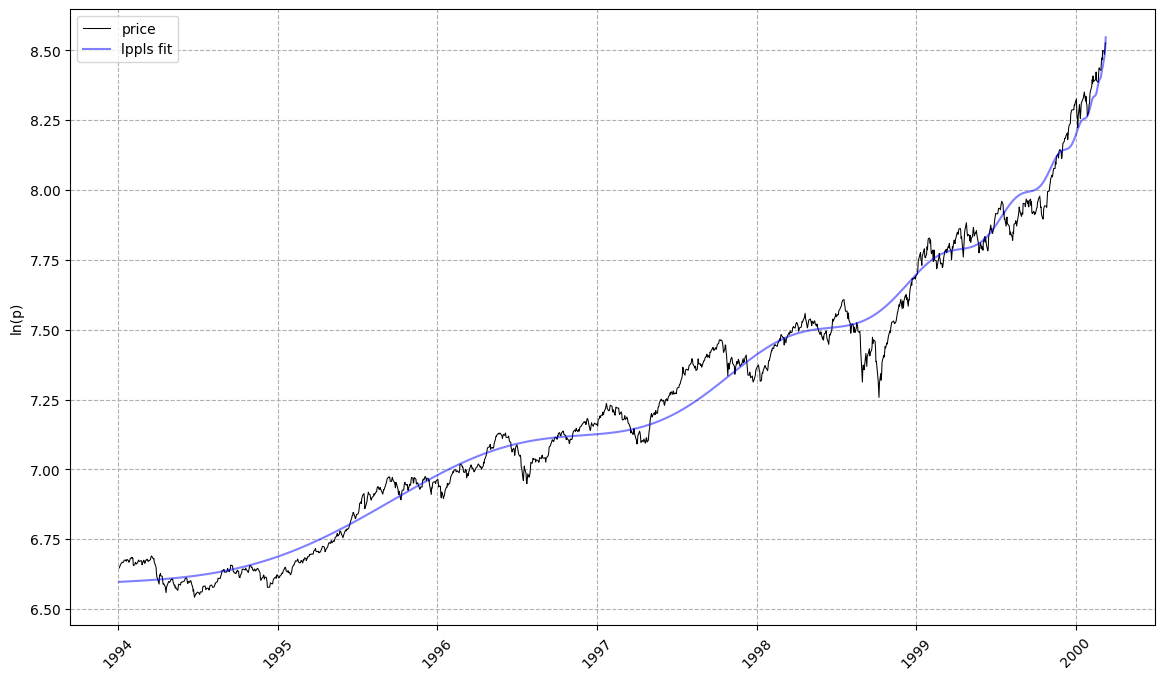

In [19]:
# visualize the fit
lppls_model.plot_fit()

In [20]:
# # compute the confidence indicator
# res = lppls_model.mp_compute_nested_fits(
#     workers=8,
#     window_size=120, 
#     smallest_window_size=30, 
#     outer_increment=1, 
#     inner_increment=5, 
#     max_searches=25,
#     # filter_conditions_config={} # not implemented in 0.6.x
# )

# lppls_model.plot_confidence_indicators(res)
# # should give a plot like the following...